In [32]:
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C, SAC, PPO

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multi-worker training (n_envs=4 => 4 environments)
vec_env = make_atari_env("PongNoFrameskip-v4", n_envs=4, seed=0)
# Frame-stacking with 4 frames
vec_env = VecFrameStack(vec_env, n_stack=4)

print(vec_env.action_space, vec_env.observation_space)
print(vec_env.action_space.sample())

Discrete(6) Box(0, 255, (84, 84, 4), uint8)
5


In [23]:
model = PPO("CnnPolicy", vec_env, verbose=1)
model.learn(total_timesteps=300000)

Using cuda device
Wrapping the env in a VecTransposeImage.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3.88e+03 |
|    ep_rew_mean     | -19.9    |
| time/              |          |
|    fps             | 2014     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.73e+03    |
|    ep_rew_mean          | -20.3       |
| time/                   |             |
|    fps                  | 1353        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.007347041 |
|    clip_fraction        | 0.037       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explaine

In [29]:
obs = vec_env.reset()
frames = []

for step in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    reward = rewards.mean()
    done = dones[0].any()
    
    screen = vec_env.render(mode='rgb_array')
    frames.append(screen) 

Green bar is the RL agent.

As picture shows, green is winning!

<Figure size 640x480 with 0 Axes>

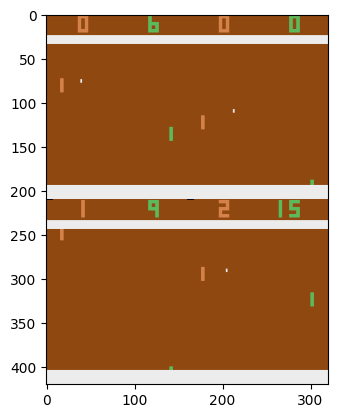

In [30]:
from IPython import display 
import matplotlib.pyplot as plt 

last_screen = vec_env.render(mode='rgb_array')
display.clear_output(wait=True)
display.display(plt.gcf()) 
plt.imshow(last_screen) 